<a href="https://colab.research.google.com/github/MariaOs02/LabBiosenales/blob/main/Practica_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PRACTICA 6 DISEÑO DE FILTROS DIGITALES

Juan Sañudo, Cristian Flores, Maria Ostos

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter, freqz

4.1. Creación de la señal

Proponga una secuencia sinusoidal 𝑥𝑒(𝑛), con 0≤𝑛≤1000, 𝐹0=0,01𝐻𝑧 y 𝐹𝑠=25𝐻𝑧. Asuma que esta señal es una señal biológica, la cual se origina por algún proceso

electrofisiológico, y que se registrará sobre la superficie de la piel mediante un sistema electrónico. El viaje de la señal hipotética 𝑥𝑒(𝑛) a través de los diversos tejidos genera una atenuación en la amplitud y un retraso temporal. El efecto del sistema electrónico de registro sobre la señal de interés es la adición de ruido gaussiano a la señal. La señal registrada finalmente es de la forma: 𝑦𝑒(𝑛)=𝛼𝑥𝑒(𝑛−𝐷)+𝑤(𝑛)

Donde α representa la amplitud, D es un retraso debido a la conducción a través de los diversos tejidos y 𝑤(𝑛) representa el ruido generado por la electrónica de los sistemas de adquisición.

· Genere las secuencias ficticias 𝑥𝑒(𝑛) y 𝑦𝑒(𝑛), implemente 𝑤(𝑛) como una secuencia de ruido Gaussiano con media cero y varianza 𝜎2=0,01, establezca 𝛼=0,8 y un retraso 𝐷=15 muestras. Grafique ambas señales.

Nota: Para generar el ruido gaussiano use la función de numpy: np.random.normal.

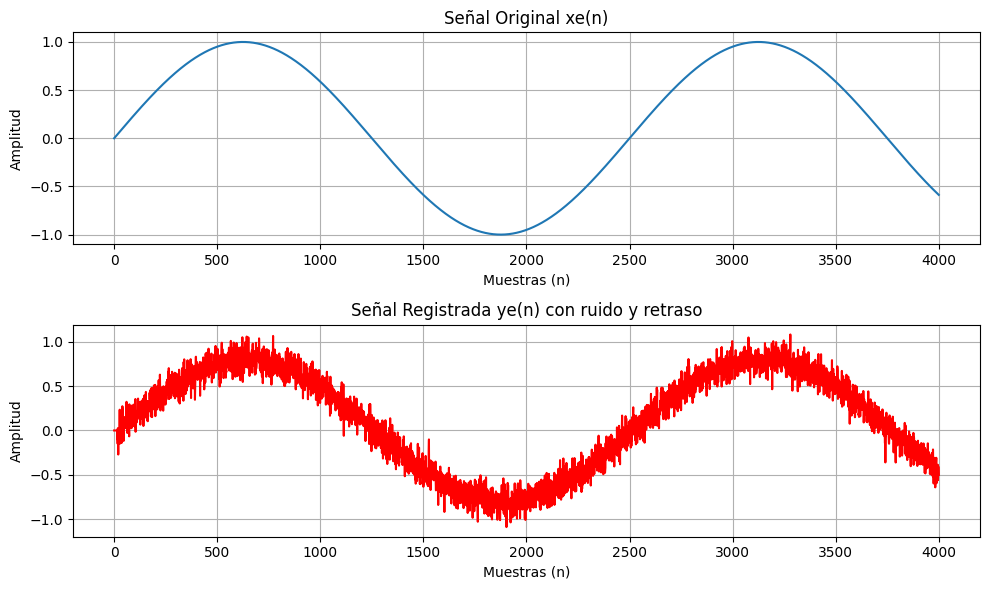

In [32]:
F0 = 0.01  # Frecuencia de la señal (Hz)
Fs = 25  # Frecuencia de muestreo (Hz)
n = np.arange(0, 4001)  # Secuencia de tiempo discreto
alpha = 0.8  # Amplitud atenuada
D = 15  # Retraso en muestras
sigma2 = 0.01  # Varianza del ruido Gaussiano

# Generación de la secuencia sinusoidal xe(n)
xe_n = np.sin(2 * np.pi * F0 * n / Fs)

# Generación del ruido Gaussiano w(n)
w_n = np.random.normal(0, np.sqrt(sigma2), len(n))

# Aplicación del retraso y atenuación: ye(n) = alpha * xe(n-D) + w(n)
ye_n = np.zeros_like(xe_n)
ye_n[D:] = alpha * xe_n[:-D] + w_n[D:]

# Gráfica de las señales
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(n, xe_n, label='Señal original xe(n)')
plt.title('Señal Original xe(n)')
plt.xlabel('Muestras (n)')
plt.ylabel('Amplitud')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(n, ye_n, label='Señal registrada ye(n)', color='r')
plt.title('Señal Registrada ye(n) con ruido y retraso')
plt.xlabel('Muestras (n)')
plt.ylabel('Amplitud')
plt.grid(True)

plt.tight_layout()
plt.show()


4.2. Diseño de un filtro


La función firwin permite diseñar un filtro FIR utilizando el método de ventanas, donde los principales argumentos de entrada son N: Orden del filtro y 𝑊𝑛: Frecuencia de corte. Para filtros digitales 𝑊𝑛 está normalizado entre 0 y 1, donde 1 es la frecuencia de Nyquist que es igual a la mitad de la frecuencia de muestreo de la señal. 𝑊𝑛 es igual a la frecuencia de corte del filtro dividido la frecuencia de Nyquist.

· Diseñe un filtro FIR pasa bajas para la señal 𝑦𝑒(𝑛), con una frecuencia de corte de 1.25 muestras/s y orden 30.

· ¿Qué cambios hay en los argumentos de la función para implementar un filtro pasa banda y pasa altas? Pruebe con una frecuencia de corte adicional de 7.5 muestras/s.

Nota: Resultado esperado diseño de 3 filtros FIR (pasa bajas, pasa altas y pasa banda)

La función iirfilter permite diseñar un filtro IIR.

· Diseñe un filtro IIR en las mismas condiciones de los puntos anteriores. Compare cambios.

Nota: Resultado esperado diseño de 3 filtros IIR (pasa bajas, pasa altas y pasa banda)

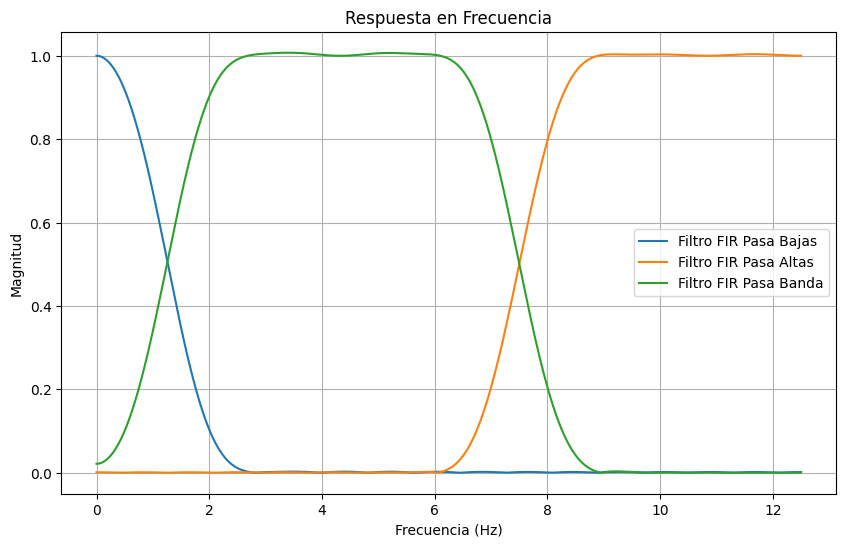

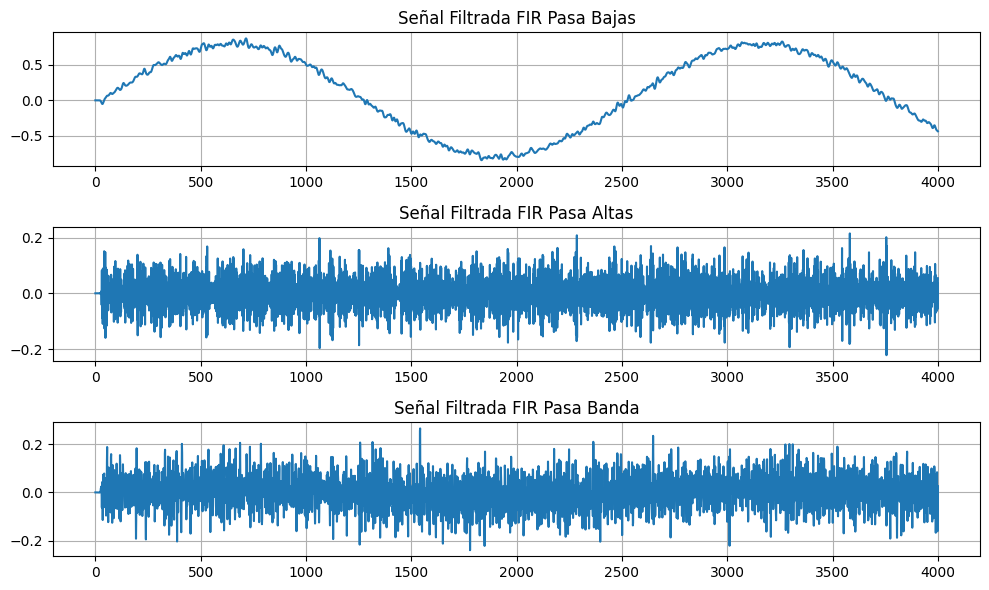

In [33]:
nyquist = Fs / 2  # Frecuencia de Nyquist
order = 30  # Orden

#Frecuencia de corte
low_cutoff = 1.25  # Pasa bajas
high_cutoff = 7.5  # Pasa altas

#filtro FIR
fir_lowpass = firwin(order + 1, low_cutoff / nyquist, pass_zero=True)
fir_highpass = firwin(order + 1, high_cutoff / nyquist, pass_zero=False)
fir_bandpass = firwin(order + 1, [low_cutoff / nyquist, high_cutoff / nyquist], pass_zero=False)

#filtros FIR a la señal ye(n)
ye_n_fir_lowpass = lfilter(fir_lowpass, 1, ye_n)
ye_n_fir_highpass = lfilter(fir_highpass, 1, ye_n)
ye_n_fir_bandpass = lfilter(fir_bandpass, 1, ye_n)

# Función  respuesta en frecuencia del filtro
def plot_filter_response(filter_coeffs, Fs, title):
    w, h = freqz(filter_coeffs, worN=8000)
    plt.plot((Fs * 0.5 / np.pi) * w, abs(h), label=title)
    plt.title('Respuesta en Frecuencia')
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Magnitud')
    plt.grid(True)

# Gráfica de las respuestas en frecuencia de los filtros FIR
plt.figure(figsize=(10, 6))
plot_filter_response(fir_lowpass, Fs, 'Filtro FIR Pasa Bajas')
plot_filter_response(fir_highpass, Fs, 'Filtro FIR Pasa Altas')
plot_filter_response(fir_bandpass, Fs, 'Filtro FIR Pasa Banda')
plt.legend()
plt.show()

# Gráfica de las señales filtradas FIR
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(n, ye_n_fir_lowpass, label='Señal FIR Pasa Bajas')
plt.title('Señal Filtrada FIR Pasa Bajas')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(n, ye_n_fir_highpass, label='Señal FIR Pasa Altas')
plt.title('Señal Filtrada FIR Pasa Altas')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(n, ye_n_fir_bandpass, label='Señal FIR Pasa Banda')
plt.title('Señal Filtrada FIR Pasa Banda')
plt.grid(True)

plt.tight_layout()
plt.show()


Comparación FIR y IIR:
Los filtros FIR tienden a ser más estables, pero pueden requerir un mayor orden esto es que mas coeficientes para obtener una respuesta similar a un filtro IIR. Los filtros IIR, en cambio, suelen requerir un menor orden para lograr una respuesta similar, pero pueden ser menos estables si no se diseñan adecuadamente.

4.3. Filtrado

Las funciones lfilter y filtfilt filtran una secuencia de información 𝑥(𝑛) usando un filtro IIR o FIR.

· Pruebe dichos comandos utilizando la información entregada por el filtro pasa bajas FIR implementado anteriormente y la señal 𝑦𝑒(𝑛) ¿Por qué se utiliza sólo el numerador? ¿A qué hace referencia el numerador? ¿Evidencia cambios en el uso

de las funciones de filtrado? ¿Cómo se puede explicar la falta de coincidencia? ¿Es adecuado el orden del filtro usado? Analice.

· Pruebe dichos comandos utilizando la información entregada por el filtro pasa bajas IIR implementado anteriormente y la señal 𝑦𝑒(𝑛) ¿Por qué se utiliza el numerador y denominador? ¿Es necesario cambiar el orden del filtro? En tal caso hágalo y analice.

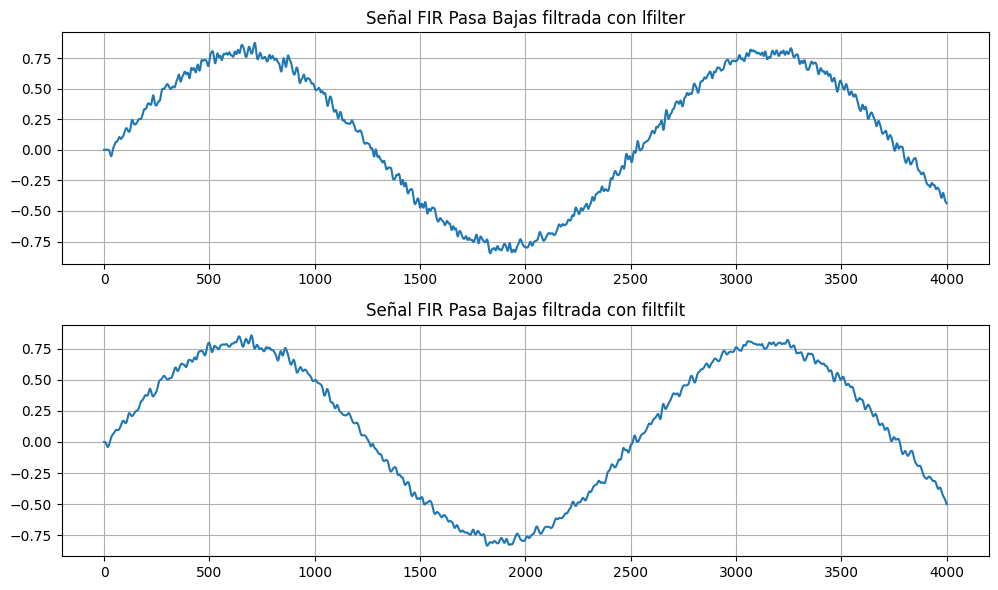

In [34]:
#Filtros FIR usandolfilteryfiltfilt


# Filtrado usando lfilter y filtfilt
ye_n_fir_lowpass_lfilter = lfilter(fir_lowpass, 1, ye_n)
ye_n_fir_lowpass_filtfilt = filtfilt(fir_lowpass, 1, ye_n)

# Gráfica de las señales filtradas FIR
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(n, ye_n_fir_lowpass_lfilter, label='lfilter (Pasa Bajas FIR)')
plt.title('Señal FIR Pasa Bajas filtrada con lfilter')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(n, ye_n_fir_lowpass_filtfilt, label='filtfilt (Pasa Bajas FIR)')
plt.title('Señal FIR Pasa Bajas filtrada con filtfilt')
plt.grid(True)

plt.tight_layout()
plt.show()


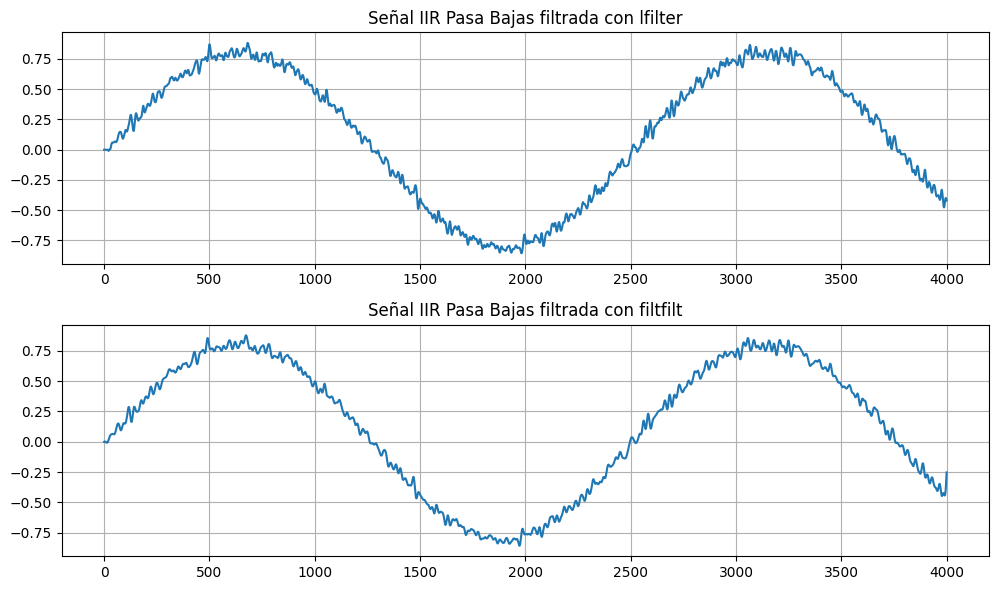

In [35]:
#Uso de filtros IIRl filtery filtfilt


D = 15
sigma2 = 0.01
xe_n = np.sin(2 * np.pi * 0.01 * n / Fs)
w_n = np.random.normal(0, np.sqrt(sigma2), len(n))
ye_n = np.zeros_like(xe_n)
ye_n[D:] = alpha * xe_n[:-D] + w_n[D:]

# Diseño del filtro IIR Pasa Bajas
iir_lowpass = iirfilter(order_iir, low_cutoff / nyquist, btype='low', ftype='butter')

# Filtrado usando lfilter y filtfilt (filtro IIR pasa bajas)
ye_n_iir_lowpass_lfilter = lfilter(iir_lowpass[0], iir_lowpass[1], ye_n)
ye_n_iir_lowpass_filtfilt = filtfilt(iir_lowpass[0], iir_lowpass[1], ye_n)

# Gráfica de las señales filtradas IIR con lfilter y filtfilt
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(n, ye_n_iir_lowpass_lfilter, label='lfilter (Pasa Bajas IIR)')
plt.title('Señal IIR Pasa Bajas filtrada con lfilter')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(n, ye_n_iir_lowpass_filtfilt, label='filtfilt (Pasa Bajas IIR)')
plt.title('Señal IIR Pasa Bajas filtrada con filtfilt')
plt.grid(True)

plt.tight_layout()
plt.show()


-Cuando se filtra con un filtro FIR, se utiliza solo el numerador porque los filtros FIR son sistemas de respuesta finita al impulso, lo que significa que no tienen retroalimentación. Esto significa que las salidas solo dependen de la entrada actual y pasadas pero no de las salidas anteriores. El numerador corresponde a los coeficientes del filtro.

**lfilter:** Es un filtrado causal que introduce un desfase en la señal. La señal filtrada dependerá de las muestras pasadas, lo que causa distorsión temporal.
**filtfilt:** Aplique el filtro en ambas direcciones hacia adelante y hacia atrás eliminando el desfase esto es porquie da como resultado una mejor preservación de la forma de la señal, pero introduce efectos de borde en los extremos de la señal.

**¿Evidencia cambios en el uso de las funciones de filtrado?** Sí, hay diferencias notables entre lfiltery filtfilt. lfilter introduce un desfase en la señal mientras que filtfilt no lo hace pero este último puede tener problemas en los extremos de la señal debido a los efectos de borde.

**¿Es adecuado el orden del filtro FIR?** El orden del filtro FIR en este caso 30 es razonable para la señal dada pero puede aumentarse si se requiere una mayor precisión en la banda de paso o de corte y gasta mas memoria del computador.

-En los filtros IIR se utilizan tanto el numerador como el denominador. Estos filtros tienen retroalimentación lo que significa que las salidas dependen no solo de las entrada sino también de las salidas anteriores, el numerador y el denominador se refieren a los coeficientes del polinomio en la transformación bilineal que definen el filtro IIR.

**¿Por qué se utiliza el numerador y denominador en el filtro IIR?** En los filtros IIR, el numerador corresponde a los coeficientes de la parte de entrada del sistema, mientras que el denominador se refiere a los coeficientes de retroalimentación. Estos filtros tienen una respuesta infinita al impulso lo que implica que las salidas dependen de las salidas anteriores.

**¿Es necesario cambiar el orden del filtro IIR?** Si se requiere una mejor atenuación en las bandas de paso o de corte puede ser necesario ajustar el orden del filtro IIR, normalmente los filtros IIR necesitan menos orden que los filtros FIR para lograr una respuesta similar pero su estabilidad puede depender de este ajuste.

**lfilter(IIR) :** Introduce desfase similar al FIR, pero los IIR suelen ser más eficientes con un orden menor.
**filtfilt(IIR) : **Elimina el desfase, pero al igual que con los FIR, puede introducir efectos de borde.
El orden del filtro IIR (4) es típico y razonable, pero puede ajustarse


4.4 Aplicación

Cargue la señal señal_filtros.txt adquirida a una frecuencia de muestreo de 500 Hz. Extraiga y trabaje con el canal 1 de la señal.

· Realice un análisis frecuencial con la función que permite calcular el periodograma de Welch de una señal ¿Hay presencia de ruido eléctrico? Analice.

· Diseñe un filtro FIR que permita eliminar el ruido de la señal. Grafique. Luego verifique nuevamente el comportamiento en frecuencia (periodograma de Welch de la señal filtrada) ¿Hay cambios? Analice.

· Grafique un segmento de las señales antes y después de filtrar, analice los cambios.

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from google.colab import files

# Cargar el archivo desde Google Colab
uploaded = files.upload()

# Verificar el nombre del archivo
filename = list(uploaded.keys())[0]

# Cargar el archivo de texto
data = np.loadtxt(filename)

# Extraer el canal 1 (asumiendo que la señal tiene múltiples canales)
canal_1 = data[:, 0]  # Si el canal 1 es la primera columna

# Definir la frecuencia de muestreo
fs = 500  # Frecuencia de muestreo en Hz

# Verificar la forma de la señal
print(f"Dimensiones de la señal: {canal_1.shape}")
print(f"Primeros 10 datos del canal 1: {canal_1[:10]}")


Saving senal_filtros.txt to senal_filtros (1).txt
Dimensiones de la señal: (60000,)
Primeros 10 datos del canal 1: [-7.0306 -7.0157 -7.0426 -7.0599 -7.0538 -7.0886 -7.0963 -7.0833 -7.1242
 -7.1107]


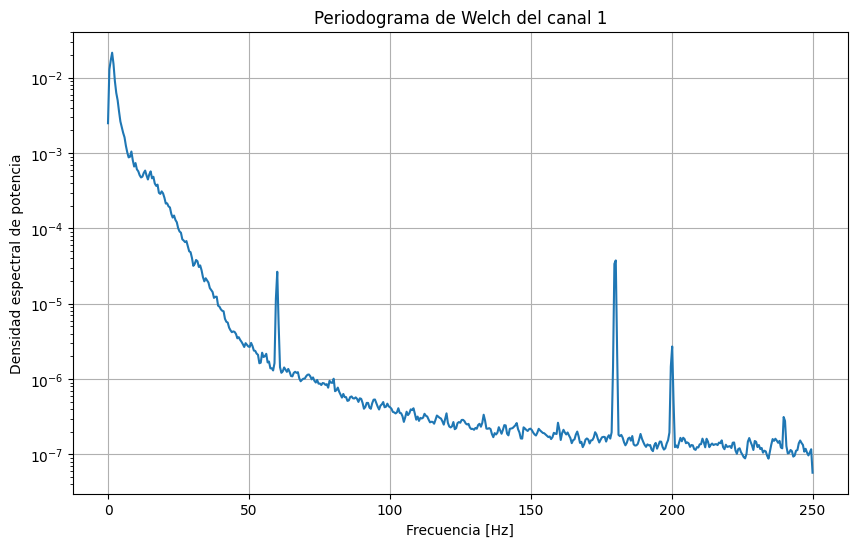

In [41]:
# Calcular el periodograma de Welch
f, Pxx_den = signal.welch(canal_1, fs, nperseg=1024)

# Graficar el periodograma
plt.figure(figsize=(10, 6))
plt.semilogy(f, Pxx_den)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad espectral de potencia')
plt.title('Periodograma de Welch del canal 1')
plt.grid(True)
plt.show()



La DSP de una señal sin ruido eléctrico es típicamente suave y continua. Si el periodograma de Welch presenta picos bruscos o irregularidades, esto puede ser un indicio de la presencia de ruido eléctrico.

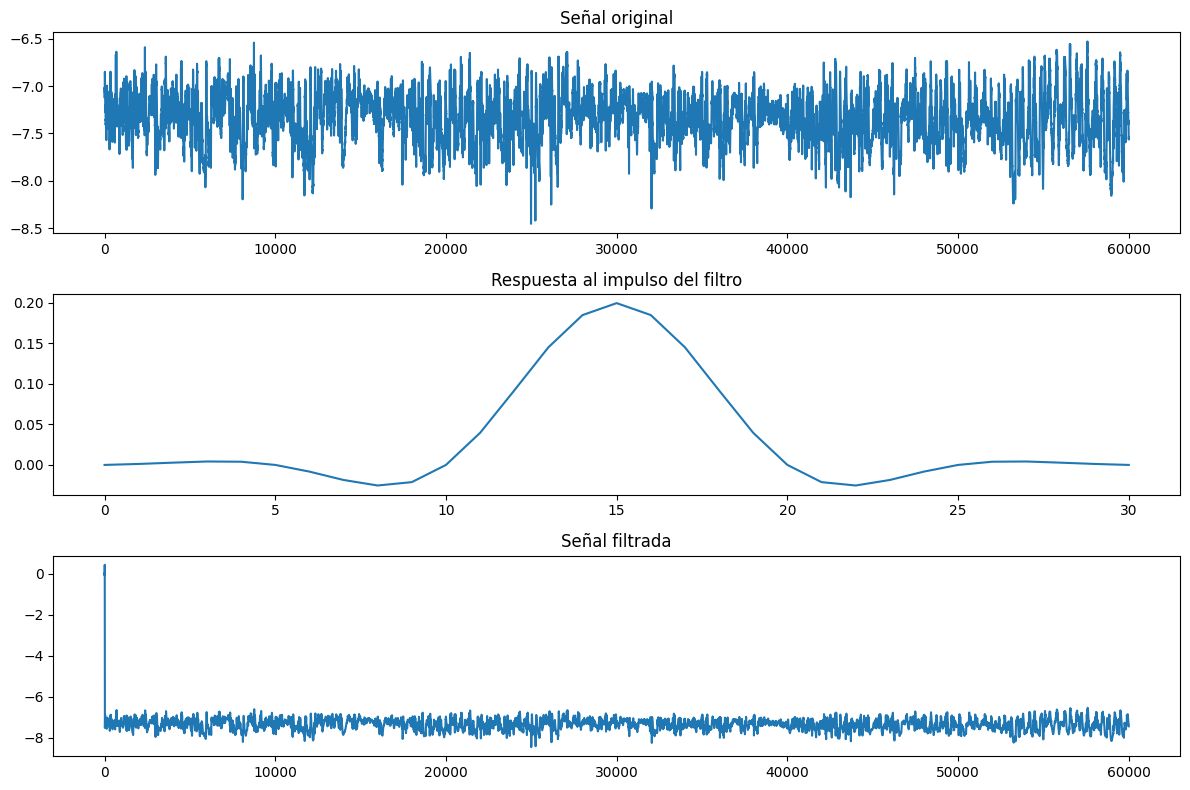

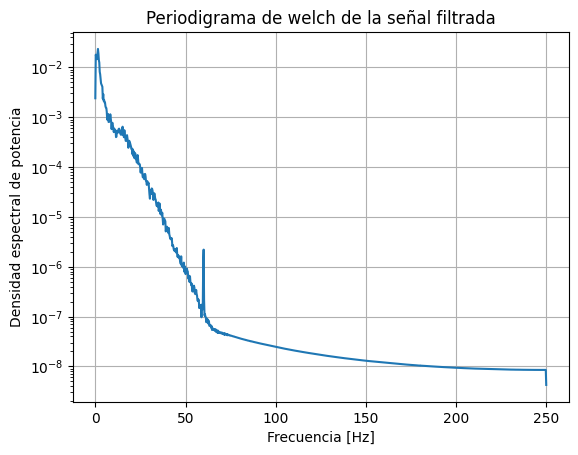

In [44]:
# Parámetros del filtro
Fc_noise = 50  # Frecuencia de corte para eliminar ruido
order = 30  # Orden del filtro
window = 'hamming'  # Ventana

#Diseño del filtro FIR
h_noise_removal = signal.firwin(order+1, Fc_noise / (fs / 2), window=window)

#filtro FIR a la señal
canal_1_filtered = signal.lfilter(h_noise_removal, 1, canal_1)

# Visualización
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(canal_1)
plt.title('Señal original')

plt.subplot(3, 1, 2)
plt.plot(h_noise_removal)
plt.title('Respuesta al impulso del filtro')

plt.subplot(3, 1, 3)
plt.plot(canal_1_filtered)
plt.title('Señal filtrada')

plt.tight_layout()
plt.show()

# Análisis en frecuencia
f, Pxx_den_filtered = signal.welch(canal_1_filtered, fs, nperseg=2048, window='hamming')
plt.figure()
plt.semilogy(f, Pxx_den_filtered)
plt.title('Periodigrama de welch de la señal filtrada')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad espectral de potencia')
plt.grid(True)
plt.show()

podemos observar que el filtro pasa-bajos ha sido aplicado con éxito a la señal original. La señal origina tiene ruido de alta frecuencia, ha sido suavizada considerablemente tras el filtrado. La respuesta al impulso del filtro confirma su naturaleza pasa-bajos, atenuando las altas frecuencias y permitiendo el paso de las bajas. La señal filtrada muestra una reducción significativa del ruido, lo que sugiere que el filtro ha cumplido su objetivo de eliminar las componentes no deseadas de alta frecuencia.

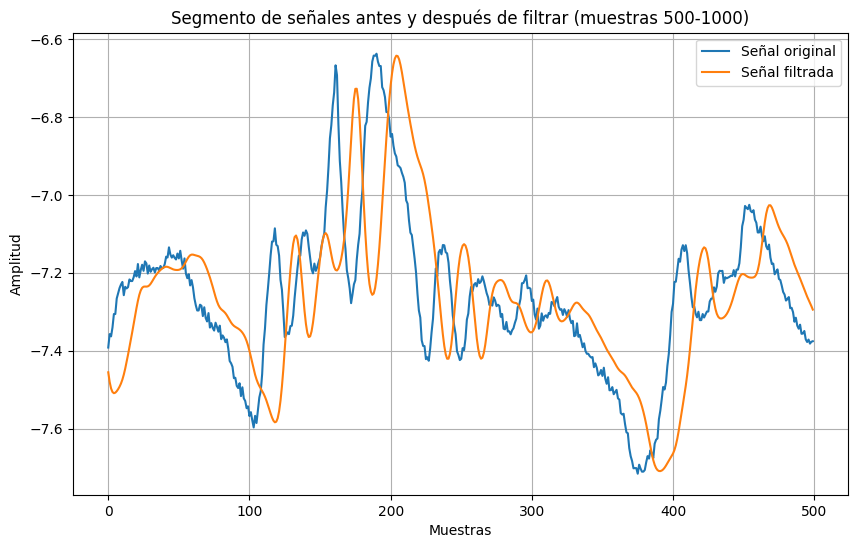

In [45]:
# Definir el intervalo de muestras a graficar
inicio_segmento = 500
fin_segmento = 1000


plt.figure(figsize=(10, 6))
plt.plot(canal_1[inicio_segmento:fin_segmento], label='Señal original')
plt.plot(canal_1_filtered[inicio_segmento:fin_segmento], label='Señal filtrada')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.legend()
plt.title('Segmento de señales antes y después de filtrar (muestras {}-{})'.format(inicio_segmento, fin_segmento))
plt.grid(True)
plt.show()